In [58]:
import gwpy
from gwpy.timeseries import TimeSeries
from gwosc.datasets import event_gps
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
gps = event_gps("GW150914")
H1data = TimeSeries.fetch_open_data('H1', gps-5, gps+5)
L1data = TimeSeries.fetch_open_data('L1', gps-5, gps+5)

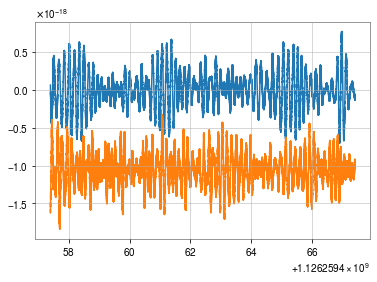

In [6]:
plt.plot(H1data.times,H1data.value)
plt.plot(L1data.times,L1data.value)

In [12]:
H1data.asd(4,2)

<FrequencySeries([6.96245290e-21, 2.22909215e-20, 8.47401812e-21,
                  ..., 1.35281939e-25, 1.48365791e-25,
                  5.02784558e-26]
                 unit=Unit("1 / Hz(1/2)"),
                 f0=<Quantity 0. Hz>,
                 df=<Quantity 0.25 Hz>,
                 epoch=<Time object: scale='utc' format='gps' value=1126259457.399902>,
                 name='Strain',
                 channel=None)>

In [29]:
import jax.numpy as jnp
from ripple.waveforms.IMRPhenomD import gen_IMRPhenomD_polar
def gen_waveform(f, theta):
    theta_waveform = theta[:9]
    ra = theta[9]
    dec = theta[10]
    hp, hc = gen_IMRPhenomD_polar(f, theta_waveform)
    return hp, hc

ref_param = jnp.array([ 3.41096639e+01,  2.42240502e-01,  7.03845904e-02,
              1.45055597e-01,  4.00156164e+02, -1.97202379e+00,
              1.08177416e+00, -6.94499550e-02,  1.95503312e+00,
              8.60901399e-01,  2.89425087e+00])

In [36]:
h1asd = H1data.asd(4,2).value
f = H1data.asd(4,2).frequencies.value
h1asd = h1asd[(f>20)*(f<2048)]
f = f[(f>20)*(f<2048)]
f = jnp.array(f)

In [44]:
hp, hc = gen_waveform(f, ref_param)
hp2,hc2 = gen_waveform(f, jnp.array([ 3.41096639e+01,  2.42240502e-01,  7.03845904e-02,
              1.45055597e-01,  4.00156164e+02, -1.97202379e+00,
              1.08177416e+00, -6.94499550e-02,  1.95503312e+00,
              8.60901399e-01,  2.89425087e+00]))

(1e-24, 1e-20)

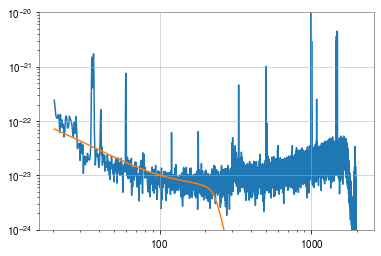

In [45]:
plt.loglog(f,h1asd)
plt.loglog(f,jnp.abs(hp))
plt.ylim(1e-24,1e-20)

/mnt/home/wwong/Environment/GW/lib/python3.10/site-packages/jax/_src/device_array.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(self._value, dtype=dtype)


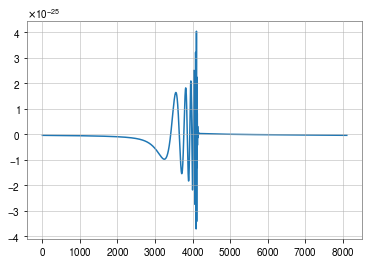

In [59]:
plt.plot(jnp.fft.ifft(hp))

In [69]:
np.fft.fftfreq(H1data.times.value.shape[0],H1data.dt.value).shape

(40960,)

In [72]:
H1data.asd(4,2)

<FrequencySeries([6.96245290e-21, 2.22909215e-20, 8.47401812e-21,
                  ..., 1.35281939e-25, 1.48365791e-25,
                  5.02784558e-26]
                 unit=Unit("1 / Hz(1/2)"),
                 f0=<Quantity 0. Hz>,
                 df=<Quantity 0.25 Hz>,
                 epoch=<Time object: scale='utc' format='gps' value=1126259457.399902>,
                 name='Strain',
                 channel=None)>

In [65]:
H1data.dt

<Quantity 0.00024414 s>